In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading Dataset
df = pd.read_csv('car data.csv')

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
print('The size of Dataframe is: ', df.shape)
df.info()

The size of Dataframe is:  (301, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
print("'Fuel_Type' variable have {} unique category : {}\n".format(df['Fuel_Type'].nunique(), df['Fuel_Type'].unique()))
print("'Seller_Type' variable have {} unique category : {}\n".format(df['Selling_type'].nunique(), \
                                                                     df['Selling_type'].unique()))
print("'Transmission' variable have {} unique category : {}\n".format(df['Transmission'].nunique(), \
                                                                    df['Transmission'].unique()))
print("'Owner' variable have {} unique category : {}".format(df['Owner'].nunique(), df['Owner'].unique()))

'Fuel_Type' variable have 3 unique category : ['Petrol' 'Diesel' 'CNG']

'Seller_Type' variable have 2 unique category : ['Dealer' 'Individual']

'Transmission' variable have 2 unique category : ['Manual' 'Automatic']

'Owner' variable have 3 unique category : [0 1 3]


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
# Let's see all column names
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
# Let's create a new variable 'Current_Year'
df['Current_Year'] = 2023

# To Calculate how old the car is, I created new feature "No_of_Years"
df['No_of_Years'] = df['Current_Year'] - df['Year']

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Current_Year,No_of_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [8]:
final_df = df.copy()            # Creating copy of created dataframe
final_df.drop(labels= ['Car_Name','Year', 'Current_Year'], axis= 1, inplace= True)          #droping unnecessary features

final_df.head()


,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


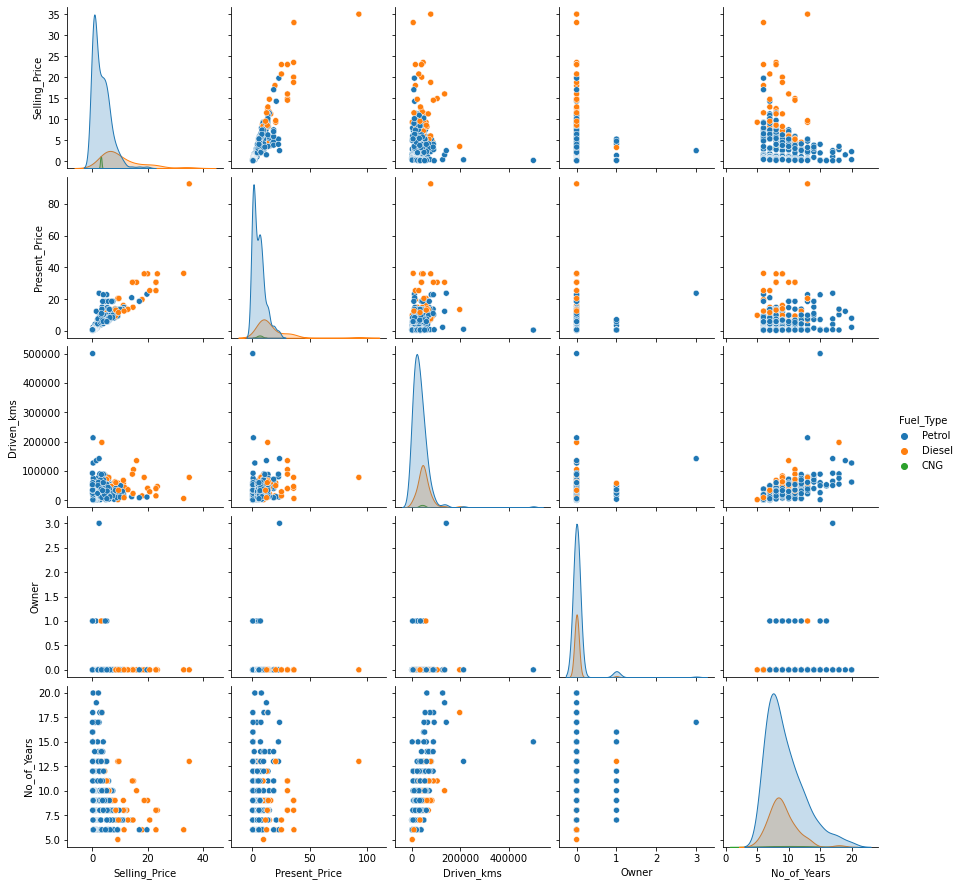

In [9]:
sns.pairplot(data= final_df, hue= 'Fuel_Type', diag_kind= 'kde')

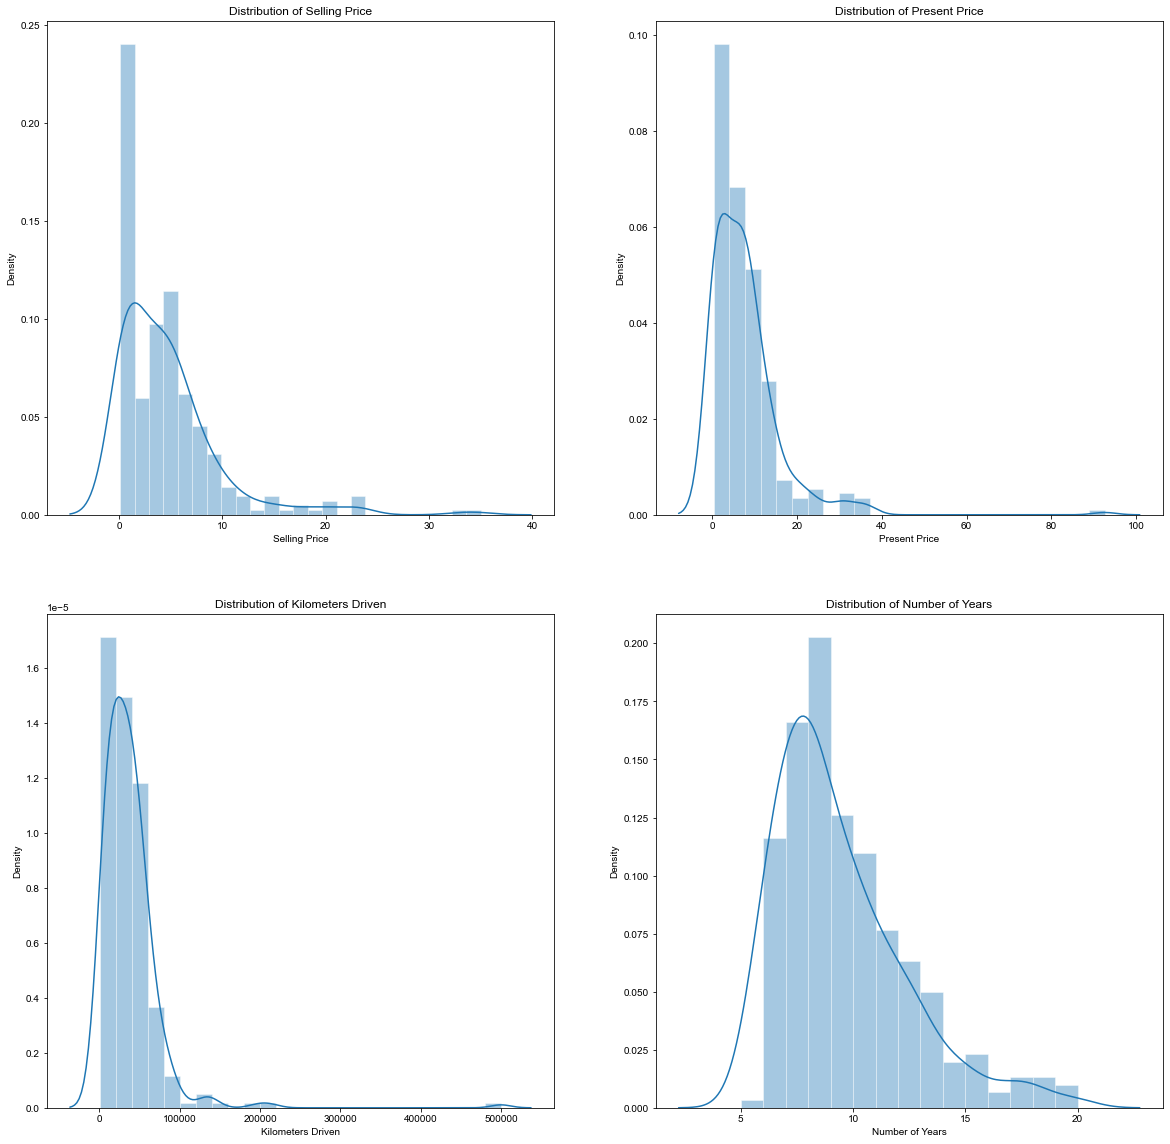

In [10]:
# Set up the figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
sns.set(font_scale=1)
sns.set_style('darkgrid')

# Plotting the distribution of 'Selling_Price'
sns.distplot(final_df['Selling_Price'], bins=25, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Selling Price')
axes[0, 0].set(xlabel='Selling Price', ylabel='Density')

# Plotting the distribution of 'Present_Price'
sns.distplot(final_df['Present_Price'], bins=25, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Present Price')
axes[0, 1].set(xlabel='Present Price', ylabel='Density')

# Plotting the distribution of 'Kms_Driven'
sns.distplot(final_df['Driven_kms'], bins=25, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Kilometers Driven')
axes[1, 0].set(xlabel='Kilometers Driven', ylabel='Density')

# Plotting the distribution of 'No_of_Years'
sns.distplot(final_df['No_of_Years'], bins=15, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Number of Years')
axes[1, 1].set(xlabel='Number of Years', ylabel='Density')

# Show the plots
plt.show()

In [11]:
print("'No_of_Years' variable have {} unique category : {}".format(final_df['No_of_Years'].nunique(),
                                                                   final_df['No_of_Years'].unique()))

'No_of_Years' variable have 16 unique category : [ 9 10  6 12  5  8  7 14 13 11 20 15 17 18 19 16]


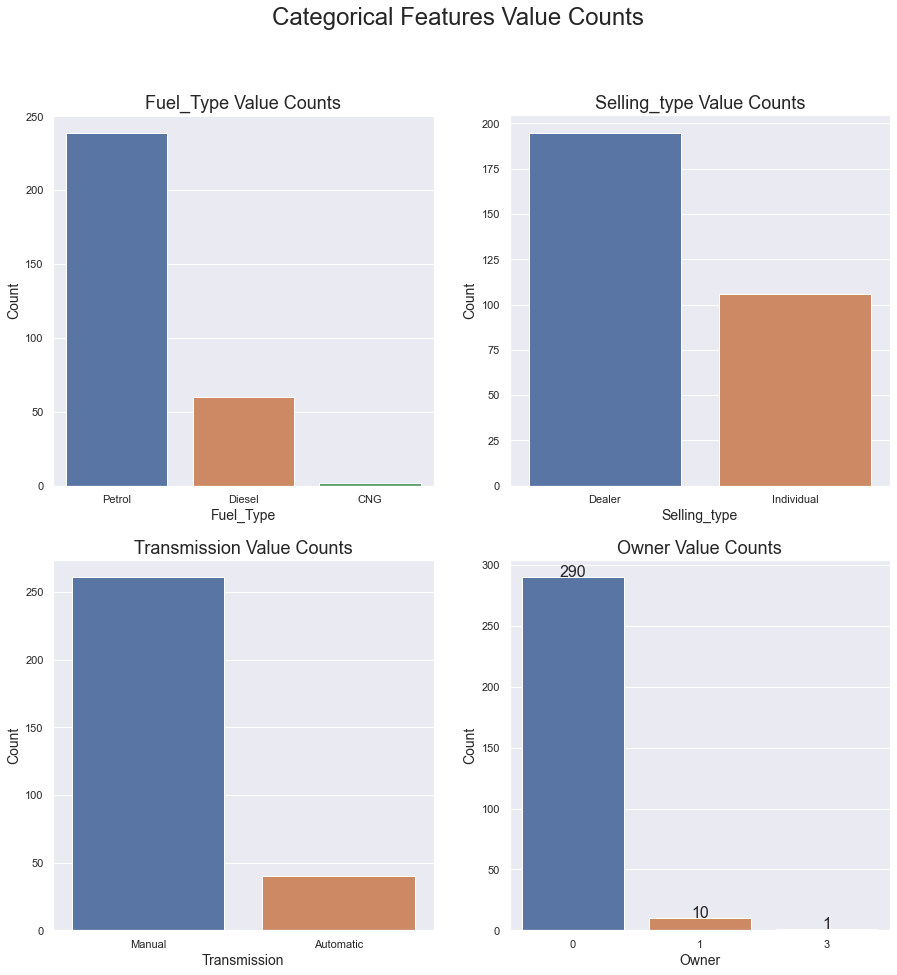

In [12]:
cat_columns = list(final_df.columns[3:7])

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
plt.suptitle('Categorical Features Value Counts', fontsize=24)

for ax, cat_col in zip(axes.flatten(), cat_columns):
    cat_order = final_df[cat_col].value_counts()
    sns.countplot(data=final_df, x=cat_col, order=cat_order.index, ax=ax)
    ax.set_xlabel(cat_col, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.set_title(f'{cat_col} Value Counts', fontsize=18)

for j, count in enumerate(cat_order):
    plt.text(j, count + 0.1, str(count), ha='center', fontsize=16)

plt.show()


Text(0.5, 1.0, 'Number of Years Value Counts')

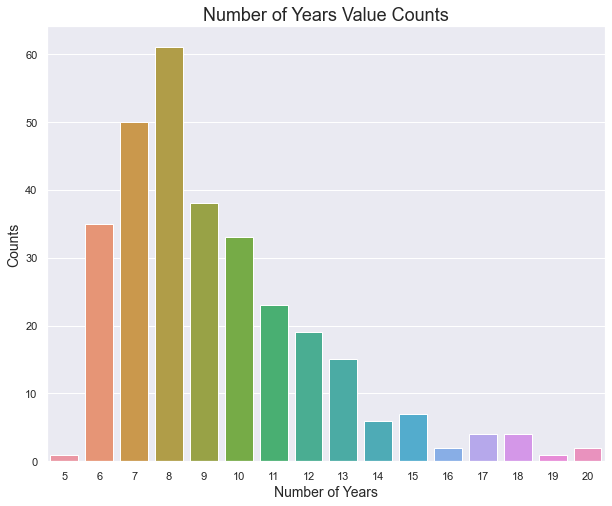

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(data= final_df, x= 'No_of_Years')
plt.xlabel('Number of Years', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Number of Years Value Counts', fontsize=18)

In [14]:
final_df = pd.get_dummies(final_df, drop_first=True)
final_df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


<AxesSubplot:>

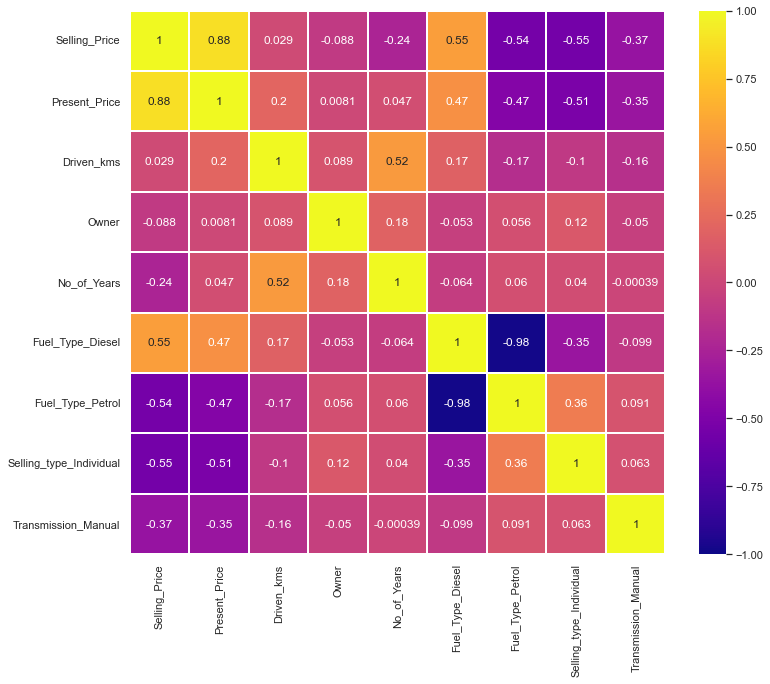

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(data = final_df.corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)

In [16]:
final_df.dtypes

Selling_Price              float64
Present_Price              float64
Driven_kms                   int64
Owner                        int64
No_of_Years                  int64
Fuel_Type_Diesel             uint8
Fuel_Type_Petrol             uint8
Selling_type_Individual      uint8
Transmission_Manual          uint8
dtype: object

In [17]:
final_df['Fuel_Type_Diesel'] = final_df['Fuel_Type_Diesel'].astype('int64')
final_df['Fuel_Type_Petrol'] = final_df['Fuel_Type_Petrol'].astype('int64')
final_df['Seller_Type_Individual'] = final_df['Selling_type_Individual'].astype('int64')
final_df['Transmission_Manual'] = final_df['Transmission_Manual'].astype('int64')

In [18]:
X = final_df.iloc[:, 1:]            # Feature matrix (independent variables)
y = final_df.iloc[:, 0]             # Target variable (dependent variable)

In [19]:
# To check important feature
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [20]:
print(model.feature_importances_)

[0.3915515  0.04377572 0.00128521 0.07701314 0.21702872 0.01214759
 0.0651753  0.12386342 0.0681594 ]


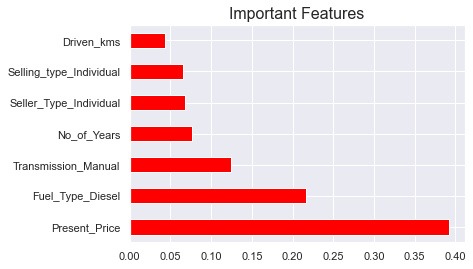

In [21]:
#plot graph of feature importances for better visualization

imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))


In [24]:
# create a new DataFrame from the above three lists
MLModels_df = pd.DataFrame({"Models": [ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Ridge', 'Lasso'],
                           "Mean Squared Error": mse,
                           "Root Mean Squared Error": rmse,
                           "Explained Variance Score": evs,
                           "R-Square Score / Accuracy": r_square_score})

MLModels_df.set_index('Models', inplace=True)
MLModels_df.head()
     

,Mean Squared Error,Root Mean Squared Error,Explained Variance Score,R-Square Score / Accuracy
Models,,,,
Linear Regression,2.215520,1.488462,0.891267,0.890325
Support Vector Rregression,20.714324,4.551299,0.019200,-0.025423
Decision Tree Regressor,0.545323,0.738460,0.973457,0.973005
Random Forest Regressor,0.433111,0.658112,0.978583,0.978560
Ridge,2.210378,1.486734,0.891320,0.890579


In [25]:
regressor = RandomForestRegressor()

## Hyperparameters
# number of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# number of features
max_features = ['auto', 'sqrt']

# max number of levels in tree
max_depth = [int(x) for x in np.linspace(start= 5, stop= 30, num= 6)]

# min. number of sample required to split a node
min_samples_split = [2,5,10,15,100]

# min. number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [26]:
# Create the random grid
random_grid= {'n_estimators': n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [27]:
regressor_random = RandomizedSearchCV(estimator=  regressor, param_distributions=  random_grid, scoring= 'neg_mean_squared_error', \
                                      n_iter = 10, cv=5, verbose = 2, random_state=42, n_jobs=1)
regressor_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [28]:
y_predictions = regressor_random.predict(X_test)
y_predictions

array([ 7.43745   ,  0.58656   ,  1.08343   ,  4.54885   , 10.07121   ,
        3.40455   ,  3.55853   ,  4.92653   ,  3.94101   ,  0.34235   ,
        5.19133   ,  4.37725   ,  5.57208   ,  0.44694   ,  0.97862   ,
        7.6197    ,  0.41877   , 11.41381   ,  0.6516    ,  5.29675   ,
        0.79753   ,  7.77318   ,  5.2375    ,  0.49225   , 12.67454   ,
        0.46213   ,  3.9123    ,  0.5529    ,  0.66547   ,  8.7568    ,
        2.93468   ,  6.10574   ,  0.75813   ,  2.8953    ,  5.17779   ,
       21.28671   , 21.09624   ,  0.29921   ,  0.19374   ,  8.31718833,
        5.37777   ,  8.18820833,  5.88405833,  9.21684   ,  3.33639   ,
        4.15202   ,  4.3863    ,  5.88150833,  0.47604   ,  0.33752   ,
        0.44207   ,  2.91546   ,  0.8582    ,  2.90235   ,  0.29953   ,
        0.70568   ,  3.25425   ,  5.43721   ,  0.26508   ,  3.30828   ,
        0.65527   ])

Text(0.5, 1.0, 'True value Vs Predicted values of Selling Price')

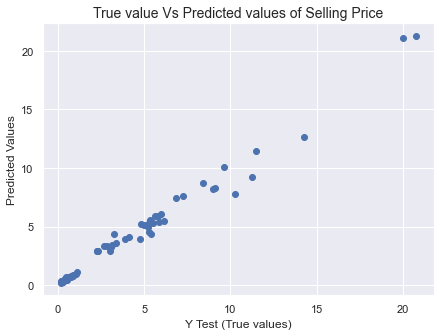

In [29]:
plt.figure(figsize=(7,5))
plt.scatter(x= y_test, y= y_predictions)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted Values')
plt.title('True value Vs Predicted values of Selling Price', fontsize=14)

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

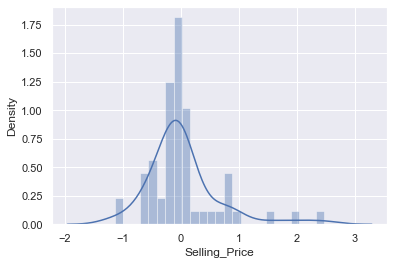

In [30]:
#residuals

sns.distplot(y_test - y_predictions)

In [31]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predictions))
print('Mean Squareed Error: ', mean_squared_error(y_test, y_predictions))
print('Root Mean Square Error: ', np.sqrt(mean_squared_error(y_test, y_predictions)))
print('\nExplaned Variance Score: ', explained_variance_score(y_true= y_test, y_pred= y_predictions))

Mean Absolute Error:  0.38231983606557474
Mean Squareed Error:  0.3822695400821583
Root Mean Square Error:  0.6182794999691954

Explaned Variance Score:  0.9811183180252546


In [32]:
print('Accuracy: ', r2_score(y_test, y_predictions))

Accuracy:  0.9810764825127681
